In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Final Model

In [28]:
'''
Takes true and predicted values and class names in order and generates a plot
'''
def plotConfMatrix(yTrue, yPredict, clsNames, confusion):
    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f', xticklabels=clsNames, yticklabels=clsNames)
    
    # Add labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return

'''
Takes training data, test data, trained model, and outputs metrics
'''
def getMetrics(model, xTrain, xTest, yTrain, yTest):
    # Predict on test data
    predictionTrain = model.predict(xTrain)
    predictionTest = model.predict(xTest)
    
    # See metrics
    trainAcc = metrics.accuracy_score(yTrain, predictionTrain)
    testAcc = metrics.accuracy_score(yTest, predictionTest)
    confusion = metrics.confusion_matrix(yTest, predictionTest, normalize='true')
    print(f'Train Accuracy: {trainAcc}%')
    print(f'Test Accuracy: {testAcc}%')
    
    # Generate Confusion Matrix
    plotConfMatrix(yTest, predictionTest, classNames, confusion)
    
    # Generate the classification report
    report = metrics.classification_report(yTest, predictionTest, output_dict=False)
    print(report)
    # reportDF = pd.DataFrame(report).transpose()
    # 
    # # Plot the classification report as a table
    # plt.figure(figsize=(10, 6))
    # sns.heatmap(reportDF, annot=True, cmap='coolwarm', fmt=".2f", yticklabels=reportDF.index, cbar=False)
    # plt.title("Classification Report")
    # plt.show()
    
    return trainAcc, testAcc, confusion

In [3]:
# fetch dataset 
covertype = fetch_ucirepo(id=31)
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets

classNames = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [4]:
# Split model into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(464809, 54) (116203, 54) (464809, 1) (116203, 1)


In [5]:
# Setup model
mlp = MLPClassifier()
mlp.fit(xTrain, yTrain)

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

Train Accuracy: 0.7569819000922959%
Test Accuracy: 0.7560131838248583%


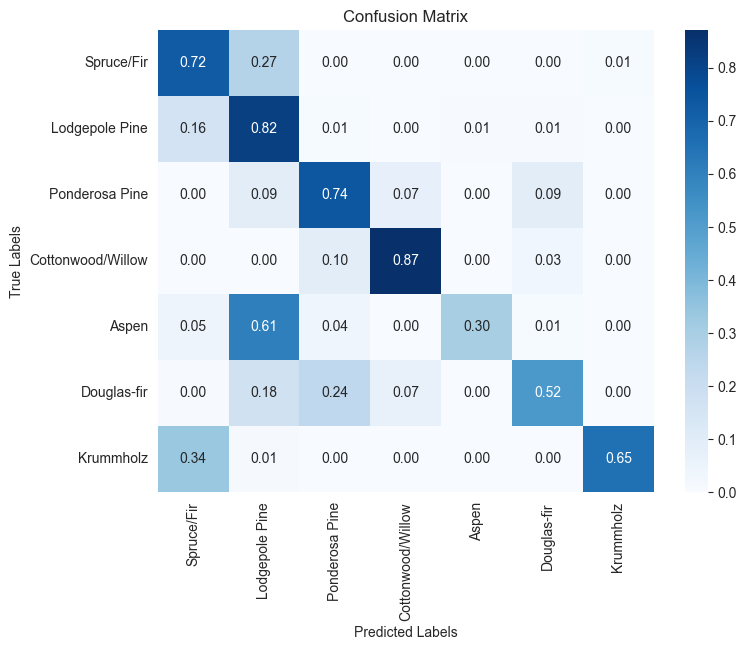

              precision    recall  f1-score   support

           1       0.74      0.72      0.73     42557
           2       0.77      0.82      0.79     56500
           3       0.79      0.74      0.76      7121
           4       0.37      0.87      0.52       526
           5       0.66      0.30      0.41      1995
           6       0.64      0.52      0.57      3489
           7       0.87      0.65      0.75      4015

    accuracy                           0.76    116203
   macro avg       0.69      0.66      0.65    116203
weighted avg       0.76      0.76      0.75    116203


In [29]:
# Get Metrics
trainAcc, testAcc, confusion = getMetrics(mlp, xTrain, xTest, yTrain, yTest)

# Hyperparameter Tuning